In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 

In [2]:
ptj_list = [[126,158],[158,200],[200,251],[251,316],[316,398]]
ptj_list_dat = [['126','158.488'],['158.488','199.525'],['199.525','251.186'],['251.186','316.224'],['316.224','398.101']]

In [3]:
#Data Operations

####################################################################################
# Data from Files
def GetData1(filename):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]
    y = data[:,3]
    err = data[:,4]
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(data[:,3],data[-1,3])

    return x, y, err, xstep, ystep

def GetData2(filename1,filename2):
    x1, y1, err1, xstep1, ystep1 = GetData1(filename1)
    x2, y2, err2, xstep2, ystep2 = GetData1(filename2)
    x = x1
    y = 0.5*(y1+y2)
    err = 0.5*np.sqrt(err1*err1+err2*err2)
    xstep = xstep1
    ystep = 0.5*(ystep1+ystep2)
    return x, y, err, xstep, ystep

def GetDataOld1(filename):
    pass
    # # data = np.loadtxt(filename, comments='#')
    # # x = data[:,0]
    # # y = data[:,3]
    # # err = data[:,4]
    # # xstep = np.append(data[:,1],data[-1,2])
    # # ystep = np.append(data[:,3],data[-1,3])

    # return x, y, err, xstep, ystep

def GetDataOld2(filename1,filename2):
    pass
    # x1, y1, err1, xstep1, ystep1 = GetData1(filename1)
    # x2, y2, err2, xstep2, ystep2 = GetData1(filename2)
    # x = x1
    # y = 0.5*(y1+y2)
    # err = 0.5*np.sqrt(err1*err1+err2*err2)
    # xstep = xstep1
    # ystep = 0.5*(ystep1+ystep2)
    # return x, y, err, xstep, ystep

def GetExpData(filename):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]
    y = data[:,3]
    err = data[:,4]
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(data[:,3],data[-1,3])
    sysp = np.append(data[:,6],data[-1,6])
    sysm = -sysp
    #print(len(data[0,:]))
    if len(data[0,:]) > 7:
        sysm = np.append(data[:,7],data[-1,7])
    return x, y, err, xstep, ystep, sysp, sysm

def GetDataRatio(x1, y1, err1, xstep1, ystep1, x2, y2, err2, xstep2, ystep2):
    x = x1
    y, err = RatioError(y1, err1, y2, err2)
    xstep = xstep1
    ystep = ystep1/ystep2
    return x, y, err, xstep, ystep

####################################################################################
# Errors
def RatioError(y1, err1, y2, err2):
    return y1/y2, np.sqrt( (err1/y2)*(err1/y2) + (y1*err2/y2/y2)*(y1*err2/y2/y2) )

def ProdError(y1, err1, y2, err2):
    return y1*y2, np.sqrt( y2*y2*err1*err1 + y1*y1*err2*err2 )

def SumError(y1, err1, y2, err2, pm=1.):
    return y1 + pm*y2, np.sqrt( err1*err1 + err2*err2 )
####################################################################################
# Integration
def GetData1Integrate(filename,bin=0):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]

    dx = 1.0
    if bin == 1:
      dx = data[:,2] - data[:,1]
    
    y = data[:,3]*dx
    err = data[:,4]*dx
    err2 = err*err

    for i in range(1,len(y)):
      y[i]=y[i-1]+y[i]
      err2[i]=err2[i-1]+err2[i]

    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(y[:],y[-1])
    err = np.sqrt(err2)

    return x, y, err, xstep, ystep

In [4]:
def CombineLast2Bins(x, y, err, xstep, ystep):
  ###############
  # Bin
  xstep[-2] = xstep[-1]
  x[-2] = 0.5*(x[-2]+x[-1])
  y[-2], err[-2] = SumError(y[-2], err[-2], y[-1], err[-1])
  y[-2] = 0.5*y[-2]
  err[-2] = 0.5*err[-2]
  #####
  ystep[-3] = 0.5*(ystep[-3]+ystep[-2])
  ystep[-2] = ystep[-3]
  #####
  x = x[:-1]
  y = y[:-1]
  err = err[:-1]
  xstep = xstep[:-1]
  ystep = ystep[:-1]
  ###############
  return x, y, err, xstep, ystep


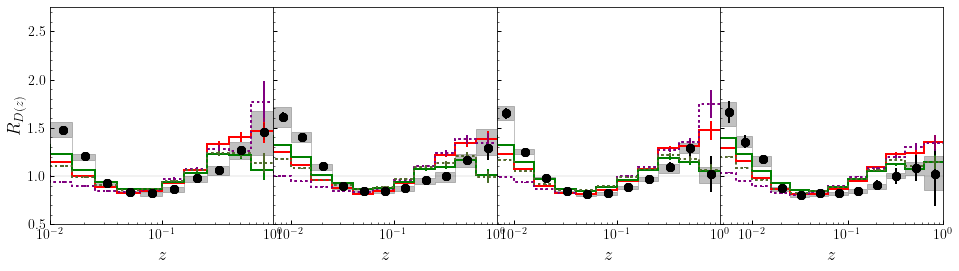

In [7]:
cent_list = [[0,10]]
for cent in cent_list:
  fig, axs = plt.subplots(1, 4, figsize=(16,4), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
  (ax1, ax2, ax3, ax4)  = axs

  for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$z$ ', fontsize=18, labelpad=6)
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.set_xscale("log")
    ax.set_xticks([0.01,0.1,1])        
    ax.axhline(1, color = "black", linewidth=0.2, alpha=0.5)
    ax.label_outer()

    ax1.set_ylabel(r'$R_{D(z)}$ ', fontsize=18, labelpad=2)

    for i in range(0,4):

      ptj = ptj_list[i]
      ptj_dat = ptj_list_dat[i]

      # file1 = '../SubStrData/FFZ/Type5_qhatA10_B0_0p30_Q2p0/OutputFile/raa_ffz_hist_total_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.0_rap0.0-3.0.txt'
      # file2 = '../SubStrData/FFZ/Type5_qhatA10_B100_0p30_Q2p0/OutputFile/raa_ffz_hist_total_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.0_rap0.0-3.0.txt'
      # file3 = '../SubStrData/FFZ/RunningAlphas_MATTER_Vacuum_LBT/OutputFile_5020_PbPb_0-10_0.35_2.0_1/raa_ffz_hist_total_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.0_rap0.0-3.0.txt'
      #exp_data = '../../exp_data/hepdata_atlas_jet_ff_5tev/R_DzRE_ratioofjetfragmentationfunctioncomparedtoppcollisions_pTjet_'+str(ptj_dat[0])+'-'+str(ptj_dat[1])+'_abs.rapidityjet_0-0.3_SQRTS_GeV_5020.0_Centrality_0-10.txt'      
      exp_data = '../../../AAPaperJetAnalysis/exp_data/hepdata_atlas_jet_ff_5tev/R_DzRE_ratioofjetfragmentationfunctioncomparedtoppcollisions_pTjet_'+str(ptj_dat[0])+'-'+str(ptj_dat[1])+'_abs.rapidityjet_0-0.3_SQRTS_GeV_5020.0_Centrality_0-10.txt'      
      x_e, y_e, err_e, xstep_e, ystep_e, sysp_e, sysm_e = GetExpData(exp_data)
      epoints = axs[i].errorbar(x_e, y_e, yerr=err_e, label='test', marker="o", linestyle="none", color = 'black',markersize=8)
      esys = axs[i].fill_between(xstep_e, ystep_e+sysp_e, ystep_e+sysm_e, step='post', color='gray', alpha=0.15)


      ###############
      # THEORY
      # pp 
      theory_pp_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/FF_ATLAS/DRAP/PP/fragf_hist_total_FragF_z_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
      x_tp, y_tp, err_tp, xstep_tp, ystep_tp = GetData1(theory_pp_data)

      # 1
      line1 = ['red','solid']
      theory1_1_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/FF_ATLAS/DRAP/COH_wR_0-5/fragf_hist_total_FragF_z_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
      theory1_2_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/FF_ATLAS/DRAP/COH_wR_5-10/fragf_hist_total_FragF_z_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
      x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData2(theory1_1_data,theory1_2_data)      
      x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
      axs[i].step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2)
      axs[i].errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
      t1curve = axs[i].errorbar(0, 0, color=line1[0],linestyle=line1[1])

      # 1
      line1 = ['purple','dotted']
      theory1_1_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/FF_ATLAS/DRAP/COH_woR_0-10/fragf_hist_total_FragF_z_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
      x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData1(theory1_1_data)
      x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
      axs[i].step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2)
      axs[i].errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
      t1curve = axs[i].errorbar(0, 0, color=line1[0],linestyle=line1[1])


      # 1
      line1 = ['green','solid']
      theory1_1_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/FF_ATLAS/DRAP/fixed_wR_0-10/fragf_hist_total_FragF_z_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
      x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData2(theory1_1_data,theory1_2_data)      
      x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
      axs[i].step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2)
      axs[i].errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
      t1curve = axs[i].errorbar(0, 0, color=line1[0],linestyle=line1[1])


      # 1
      line1 = ['darkolivegreen','dotted']
      theory1_1_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/FF_ATLAS/DRAP/fixed_woR_0-10/fragf_hist_total_FragF_z_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
      x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData2(theory1_1_data,theory1_2_data)      
      x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
      axs[i].step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2)
      axs[i].errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
      t1curve = axs[i].errorbar(0, 0, color=line1[0],linestyle=line1[1])

      xmin = xstep_e[0]
      xmax = xstep_e[-1]

      axs[i].set_xlim(xmin,xmax)
      axs[i].set_ylim(0.5,2.75)




0

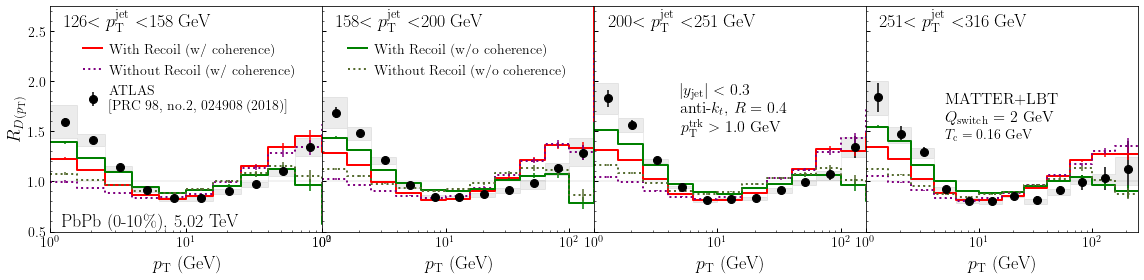

In [27]:
cent_list = [[0,10]]
for cent in cent_list:
  fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
  (ax1, ax2, ax3, ax4)  = axs

  for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$p_{\mathrm{T}}$ (GeV)', fontsize=18, labelpad=6)
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.set_xscale("log")
    ax.set_xticks([1,10,100])        
    ax.axhline(1, color = "black", linewidth=0.2, alpha=0.5)
    ax.label_outer()

    ax1.set_ylabel(r'$R_{D(p_{\mathrm{T}})}$ ', fontsize=18, labelpad=2)

  for i in range(0,4):

    lab1 = ''
    lab2 = ''
    lab3 = ''
    lab4 = ''    
    labd = ''
    if i == 0:
      labd = 'ATLAS \n[PRC 98, no.2, 024908 (2018)]'        
      lab1 = 'With Recoil (w/ coherence)'
      lab2 = 'Without Recoil (w/ coherence)'
    if i == 1:
      lab3 = 'With Recoil (w/o coherence)'
      lab4 = 'Without Recoil (w/o coherence)'


    ptj = ptj_list[i]
    ptj_dat = ptj_list_dat[i]

      # file1 = '../SubStrData/FFZ/Type5_qhatA10_B0_0p30_Q2p0/OutputFile/raa_ffz_hist_total_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.0_rap0.0-3.0.txt'
      # file2 = '../SubStrData/FFZ/Type5_qhatA10_B100_0p30_Q2p0/OutputFile/raa_ffz_hist_total_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.0_rap0.0-3.0.txt'
      # file3 = '../SubStrData/FFZ/RunningAlphas_MATTER_Vacuum_LBT/OutputFile_5020_PbPb_0-10_0.35_2.0_1/raa_ffz_hist_total_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.0_rap0.0-3.0.txt'
      #exp_data = '../../../AAPaperJetAnalysis/exp_data/hepdata_atlas_jet_ff_5tev/R_DptRE_ratioofjetfragmentationfunctioncomparedtoppcollisions_pTjet_'+str(ptj_dat[0])+'-'+str(ptj_dat[1])+'_abs.rapidityjet_0-0.3_SQRTS_GeV_5020.0_Centrality_0-10.txt'      
    exp_data = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/atlas_5tev_ffpt/raa_Dpt_0-10_'+str(ptj[0])+'-'+str(ptj[1])+'_0-0.3.txt'      
    x_e, y_e, err_e, xstep_e, ystep_e, sysp_e, sysm_e = GetExpData(exp_data)
    epoints = axs[i].errorbar(x_e, y_e, yerr=err_e, marker="o", linestyle="none", color = 'black',markersize=8, label=labd)
    esys = axs[i].fill_between(xstep_e, ystep_e+sysp_e, ystep_e+sysm_e, step='post', color='gray', alpha=0.15)


    ###############
    # THEORY
    # pp 
    theory_pp_data = '/Users/yasukitachibana/GoogleDrive/Downloads/FF_ATLAS/DRAP/PP/fragf_hist_total_FragF_pt_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
    x_tp, y_tp, err_tp, xstep_tp, ystep_tp = GetData1(theory_pp_data)

    # 1
    line1 = ['red','solid']
    theory1_1_data = '/Users/yasukitachibana/GoogleDrive/Downloads/FF_ATLAS/DRAP/COH_wR_0-5/fragf_hist_total_FragF_pt_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
    theory1_2_data = '/Users/yasukitachibana/GoogleDrive/Downloads/FF_ATLAS/DRAP/COH_wR_5-10/fragf_hist_total_FragF_pt_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
    x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData2(theory1_1_data,theory1_2_data)      
    x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
    axs[i].step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2, label=lab1)
    axs[i].errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
    t1curve = axs[i].errorbar(0, 0, color=line1[0],linestyle=line1[1])

    # 1
    line1 = ['purple','dotted']
    theory1_1_data = '/Users/yasukitachibana/GoogleDrive/Downloads/FF_ATLAS/DRAP/COH_woR_0-10/fragf_hist_total_FragF_pt_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
    x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData1(theory1_1_data)
    x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
    axs[i].step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2, label=lab2)
    axs[i].errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
    t1curve = axs[i].errorbar(0, 0, color=line1[0],linestyle=line1[1])


     # 1
    line1 = ['green','solid']
    theory1_1_data = '/Users/yasukitachibana/GoogleDrive/Downloads/FF_ATLAS/DRAP/fixed_wR_0-10/fragf_hist_total_FragF_pt_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
    x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData1(theory1_1_data)
    x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
    axs[i].step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2, label=lab3)
    axs[i].errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
    t1curve = axs[i].errorbar(0, 0, color=line1[0],linestyle=line1[1])


    # 1
    line1 = ['darkolivegreen','dotted']
    theory1_1_data = '/Users/yasukitachibana/GoogleDrive/Downloads/FF_ATLAS/DRAP/fixed_woR_0-10/fragf_hist_total_FragF_pt_jetr0.4_ptj'+str(ptj[0])+'-'+str(ptj[1])+'_rapj0.0-0.3_pt1.0-398.1_rap0.0-1.0.txt'      
    x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData1(theory1_1_data)
    x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
    axs[i].step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2, label=lab4)
    axs[i].errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
    t1curve = axs[i].errorbar(0, 0, color=line1[0],linestyle=line1[1])

    xmin = xstep_e[0]
    xmax = xstep_e[-1]

    def xlength(a):
      return xmin*pow(xmax/xmin,a)        


    axs[i].set_xlim(xmin,xmax)
    axs[i].set_ylim(0.5,2.75)

    axs[i].text(xlength(0.05), 2.55, str(ptj[0])+r'$<p_{\mathrm{T}}^{\mathrm{jet}}<$'+str(ptj[1])+r' GeV', fontsize = 18, ha = 'left')

    if i == 0 or i ==1:
      axs[i].legend(bbox_to_anchor=(0.97, 0.925), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=14,edgecolor='none', frameon=True, facecolor='none')


  axs[0].text(1.2, 0.55, r'PbPb ('+str(cent[0])+'-'+str(cent[1])+'$\%$), $5.02$ TeV', fontsize = 18, ha = 'left')

    

  axs[2].text(5, 1.5, r'$|y_{\mathrm {jet}}|<0.3$'+'\n'+r'anti-$k_t$, $R=0.4$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{trk}}>1.0$ GeV', fontsize = 16, ha = 'left')
  axs[3].text(5, 1.77, r'MATTER+LBT', fontsize = 16, ha = 'left')
  axs[3].text(5, 1.6, r'$Q_{\mathrm{switch}}=2$ GeV', fontsize = 16, ha = 'left')
  axs[3].text(5, 1.43, r'$T_{\mathrm{c}}=0.16$ GeV', fontsize = 14, ha = 'left')

  plt.tight_layout()
  plt.savefig('trento_new_raa_Dz_ptj'+str(cent[0])+'-'+str(cent[1])+'_rapj0.0-0.3.pdf')

import os
os.system('open .')
